In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import nltk
import string
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter 
from nltk.stem.porter import PorterStemmer
stopwords = set(stopwords.words('english'))

In [3]:
train = pd.read_csv('./dataset/Constraint_English_Train - Sheet1.csv')
val = pd.read_csv('./dataset/Constraint_English_Val - Sheet1.csv')
test = pd.read_csv('./dataset/english_test_with_labels - Sheet1.csv')

In [4]:
dataset = pd.concat([train, val, test], ignore_index=True)

In [5]:
dataset.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   tweet   10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.9+ KB


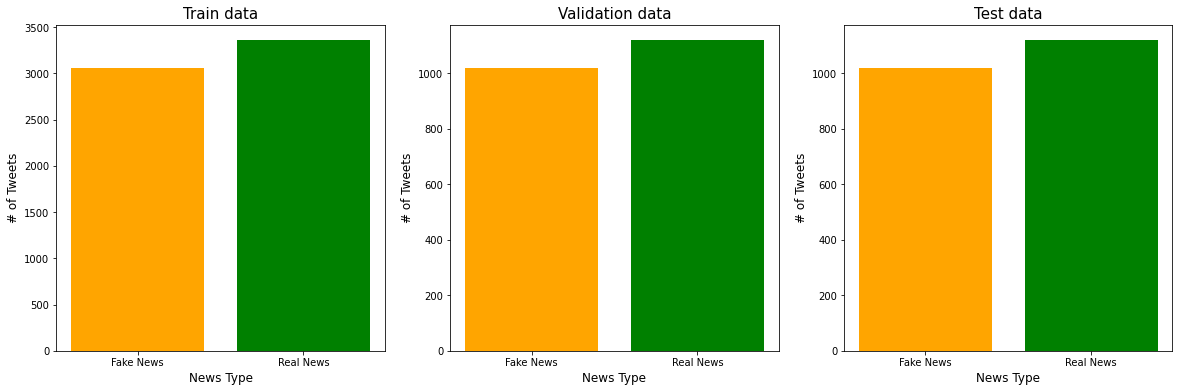

In [46]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(20, 6))
#plt.figure(figsize=(10, 5))
ax0.bar('Fake News', len(train[train['label'] == 'fake']), color='orange')
ax0.bar('Real News', len(train[train['label'] == 'real']), color='green')
ax0.set_xlabel('News Type', size=12)
ax0.set_ylabel('# of Tweets', size=12)
ax0.set_title('Train data', size=15)

ax1.bar('Fake News', len(val[val['label'] == 'fake']), color='orange')
ax1.bar('Real News', len(val[val['label'] == 'real']), color='green')
ax1.set_xlabel('News Type', size=12)
ax1.set_ylabel('# of Tweets', size=12)
ax1.set_title('Validation data', size=15)

ax2.bar('Fake News', len(test[test['label'] == 'fake']), color='orange')
ax2.bar('Real News', len(test[test['label'] == 'real']), color='green')
ax2.set_xlabel('News Type', size=12)
ax2.set_ylabel('# of Tweets', size=12)
ax2.set_title('Test data', size=15)

plt.show()

In [9]:
all_tweets = dataset['tweet']
fake_tweets = dataset[dataset['label'] == 'fake']['tweet']
real_tweets = dataset[dataset['label'] == 'real']['tweet']

In [10]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = re.sub(r"http(\S)+",' ',text) 
        tx = tx.replace('&amp',' ')
        tx = tx.translate(str.maketrans('', '', string.punctuation))
        tx = re.sub(r"[^0-9a-zA-Z]+",' ',tx)
        tx = tx.lower().split()
        tx = [x.strip() for x in tx if not x.isdigit()]
        tx = [w for w in tx if not w in stopwords and len(w) > 1]
        tx = " ".join(tx)
        all_tokens += tx + " "
    return all_tokens

In [12]:
all_tokens = concat_all_sentences(all_tweets)
fake_tokens = concat_all_sentences(fake_tweets)   
real_tokens = concat_all_sentences(real_tweets)

In [14]:
def print_words_cloud(tokens):
    wordcloud = WordCloud(
        width = 400, 
        height = 400, 
        background_color ='white', 
        min_font_size = 10
    ).generate(tokens)
    
    # plot the WordCloud image                        
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

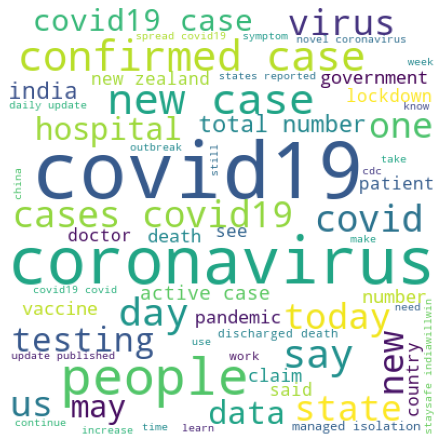

In [15]:
print_words_cloud(all_tokens)

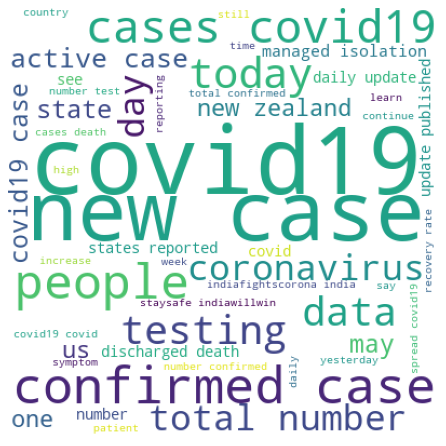

In [16]:
print_words_cloud(real_tokens)

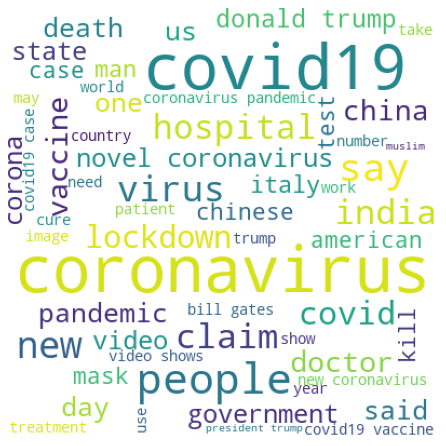

In [17]:
print_words_cloud(fake_tokens)

In [18]:
print('All tokens: ', len(set(all_tokens.split())))
print('Fake tokens: ', len(set(fake_tokens.split())))
print('Real tokens: ', len(set(real_tokens.split())))
print('Intersection real-fake tokens: ', len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

All tokens:  18346
Fake tokens:  12122
Real tokens:  10513
Intersection real-fake tokens:  4289


In [19]:
Counter(all_tokens.split()).most_common(20)

[('covid19', 5442),
 ('cases', 2825),
 ('coronavirus', 2737),
 ('new', 1819),
 ('people', 1278),
 ('tests', 1190),
 ('deaths', 1052),
 ('states', 947),
 ('total', 898),
 ('covid', 877),
 ('number', 876),
 ('confirmed', 824),
 ('testing', 796),
 ('reported', 793),
 ('india', 732),
 ('health', 671),
 ('today', 666),
 ('state', 567),
 ('one', 552),
 ('indiafightscorona', 551)]

In [20]:
Counter(fake_tokens.split()).most_common(20)

[('coronavirus', 2155),
 ('covid19', 1971),
 ('people', 503),
 ('virus', 402),
 ('trump', 381),
 ('new', 366),
 ('pandemic', 355),
 ('vaccine', 347),
 ('india', 323),
 ('says', 322),
 ('video', 313),
 ('covid', 305),
 ('cases', 264),
 ('president', 261),
 ('hospital', 257),
 ('lockdown', 243),
 ('news', 230),
 ('us', 228),
 ('corona', 228),
 ('shows', 219)]

In [21]:
Counter(real_tokens.split()).most_common(20)

[('covid19', 3471),
 ('cases', 2561),
 ('new', 1453),
 ('tests', 1093),
 ('deaths', 882),
 ('total', 866),
 ('states', 844),
 ('number', 806),
 ('people', 775),
 ('confirmed', 748),
 ('reported', 735),
 ('testing', 693),
 ('today', 612),
 ('coronavirus', 582),
 ('covid', 572),
 ('indiafightscorona', 546),
 ('report', 486),
 ('health', 477),
 ('update', 450),
 ('state', 445)]